In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sys.path.append('..')
from utils import *
from data import *
from plotting import *
from experiment import train_test_random_top_split

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0
mpl.rcParams['figure.dpi']= 100

sns.set_style('ticks')
sns.set_style('whitegrid')
sns.set_palette('cubehelix')

In [4]:
kids = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.500k.fits'), columns=COLUMNS_KIDS_ALL)

Data shape: (501754, 44)
Droping NANs: 226903 (45.22%) left


In [5]:
kids = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.500k.fits'), columns=COLUMNS_KIDS_ALL)

Data shape: (501754, 44)
Droping NANs: 226903 (45.22%) left


In [6]:
kids_x_sdss = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS)

Data shape: (152244, 49)
Droping NANs: 130777 (85.90%) left


In [7]:
print(get_column_desc(kids_x_sdss['CLASS']))

GALAXY - 86852 (66.41%)
QSO - 16069 (12.29%)
STAR - 27856 (21.30%)


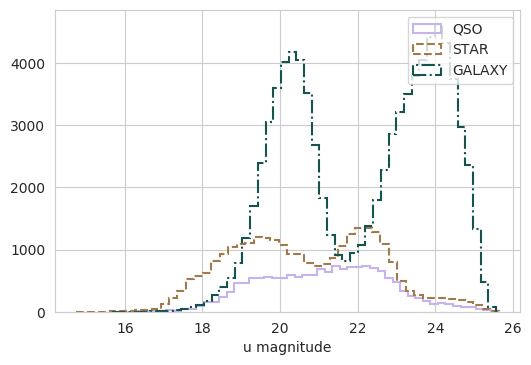

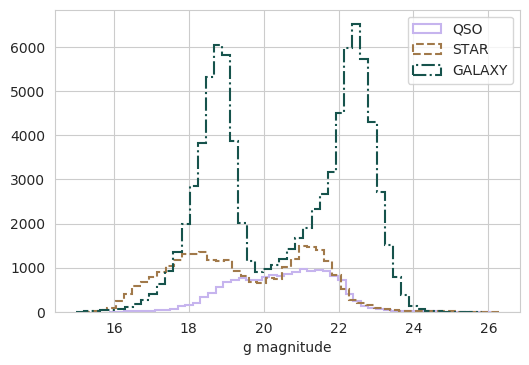

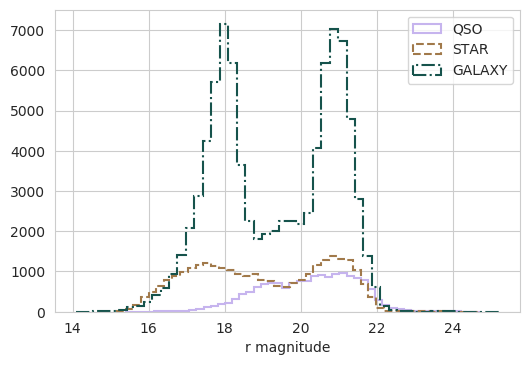

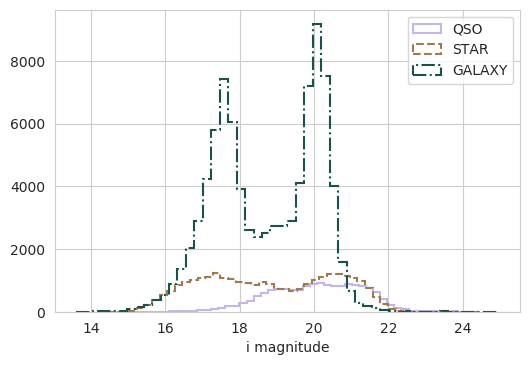

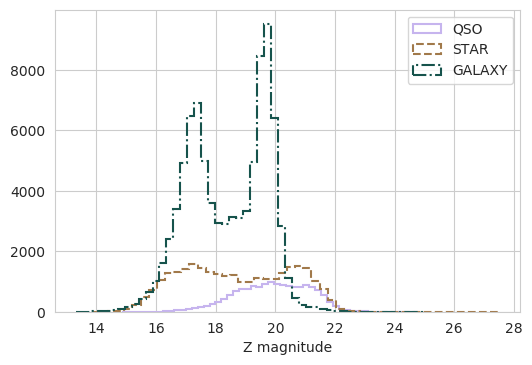

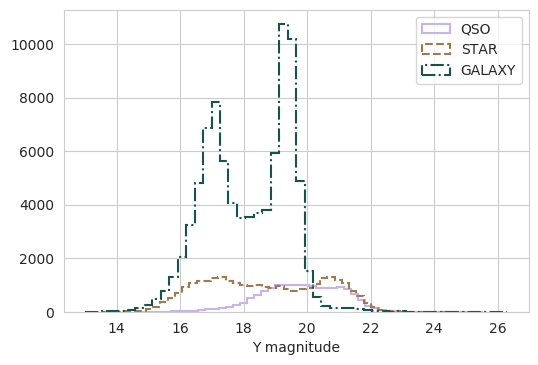

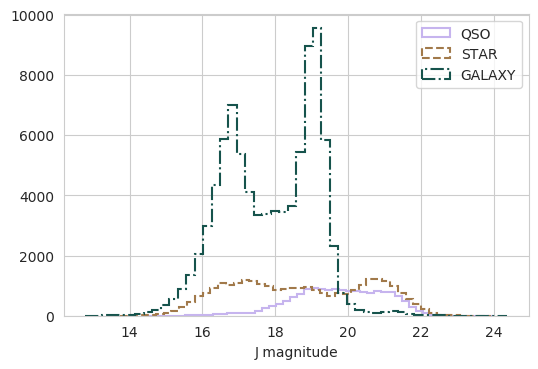

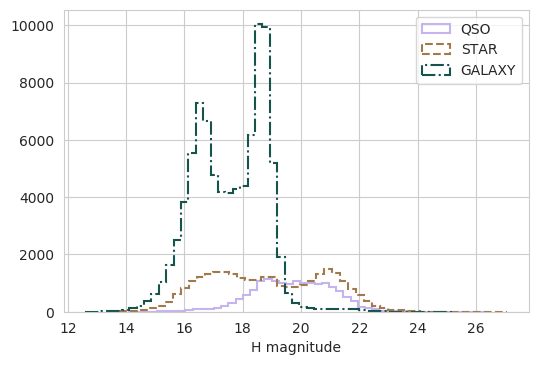

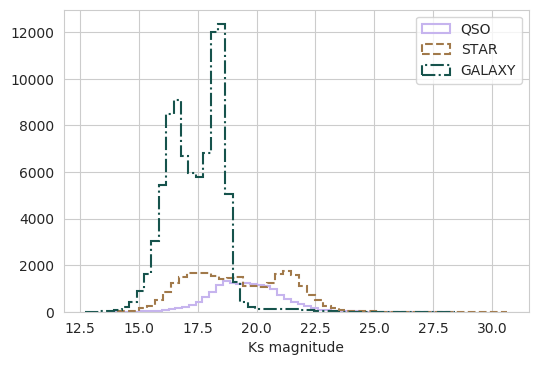

In [7]:
plot_class_histograms(kids_x_sdss, BAND_COLUMNS)

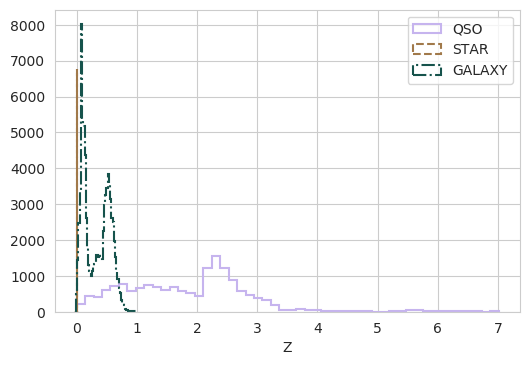

In [8]:
plot_class_histograms(kids_x_sdss, ['Z'])

## random test

In [16]:
kids_train, kids_test = train_test_split(kids_x_sdss, test_size=0.2, random_state=427)

In [17]:
print(get_column_desc(kids_train['CLASS']))

GALAXY - 69397 (66.33%)
QSO - 12885 (12.32%)
STAR - 22339 (21.35%)


In [18]:
print(get_column_desc(kids_test['CLASS']))

GALAXY - 17455 (66.73%)
QSO - 3184 (12.17%)
STAR - 5517 (21.09%)


## random and top test

In [12]:
_, _, _, kids_train, kids_test_rnd, kids_test_top = \
    train_test_random_top_split(kids_x_sdss[get_mag_str('r')], kids_x_sdss, top_test_size=0.1, random_test_size=0.1)

In [13]:
kids_train.shape

(104623, 147)

In [14]:
kids_test_top.shape

(13077, 147)

In [15]:
kids_test_rnd.shape

(13077, 147)

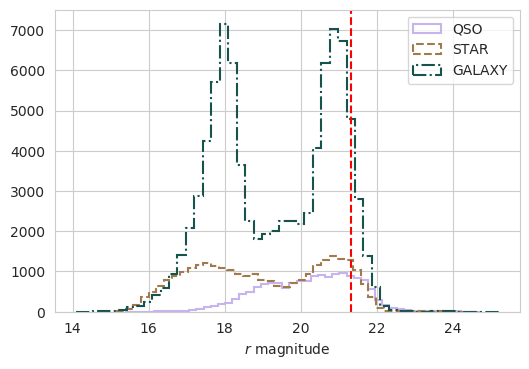

In [16]:
class_column='CLASS'
title=None
log_y=False
c = get_mag_str('r')

color_palette = get_cubehelix_palette(len(BASE_CLASSES))
plt.figure()
for i, t in enumerate(BASE_CLASSES):
    sns.distplot(kids_x_sdss.loc[kids_x_sdss[class_column] == t][c], label=t, kde=False, rug=False,
                 color=color_palette[i],
                 hist_kws={'alpha': 1.0, 'histtype': 'step', 'linewidth': 1.5, 'linestyle': get_line_style(i)})

plt.axvline(x=21.3084, color='r', linestyle='--')

if log_y: plt.yscale('log')
if title: plt.title(title)
plt.xlabel(pretty_print_feature(c))
    
plt.legend()
plt.show()

In [17]:
print(get_column_desc(kids_train['CLASS']))

GALAXY - 70845 (67.71%)
QSO - 11274 (10.78%)
STAR - 22504 (21.51%)


In [18]:
print(get_column_desc(kids_test_rnd['CLASS']))

GALAXY - 8800 (67.29%)
QSO - 1509 (11.54%)
STAR - 2768 (21.17%)


In [19]:
print(get_column_desc(kids_test_top['CLASS']))

GALAXY - 7207 (55.11%)
QSO - 3286 (25.13%)
STAR - 2584 (19.76%)


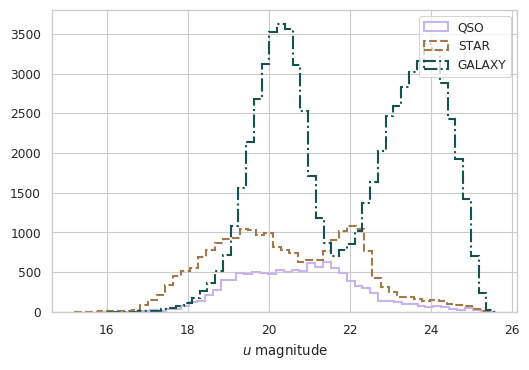

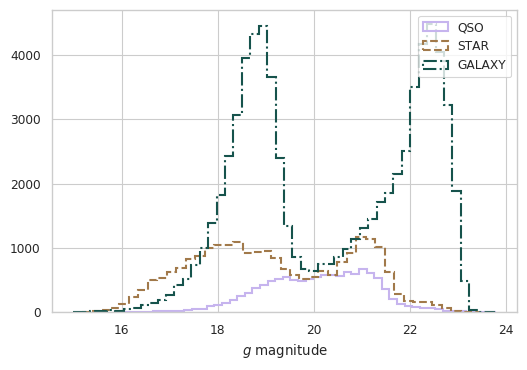

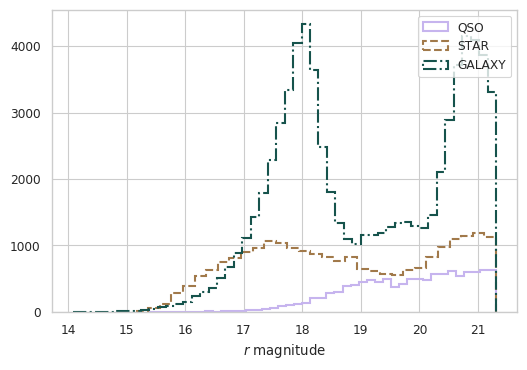

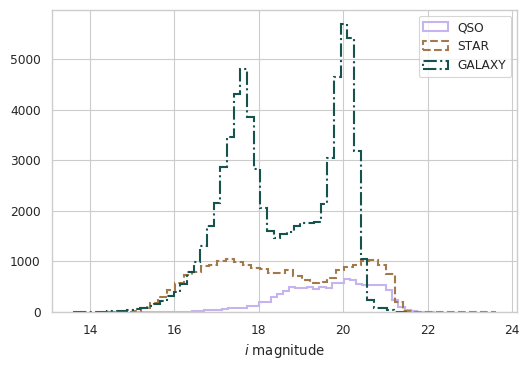

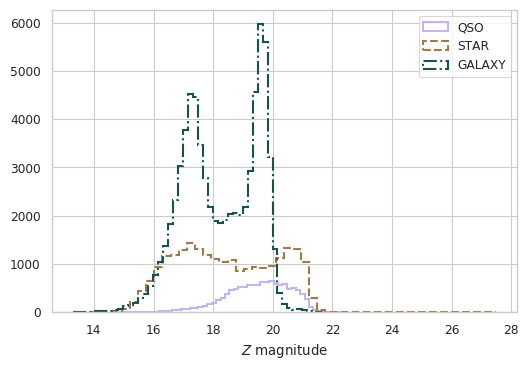

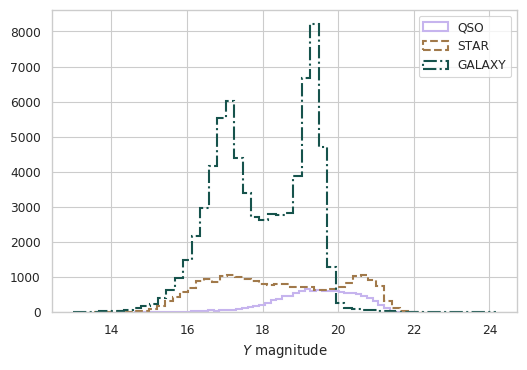

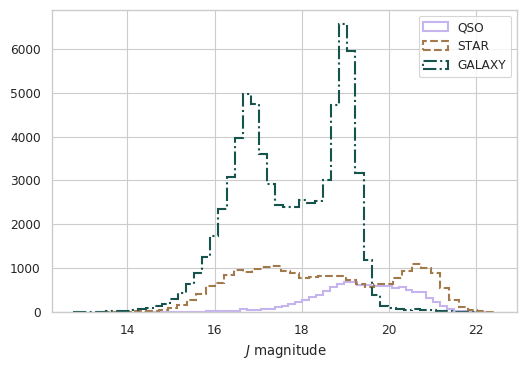

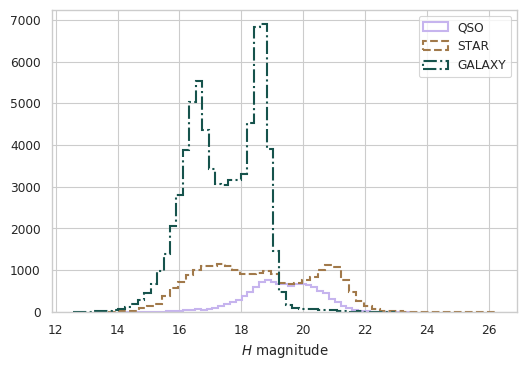

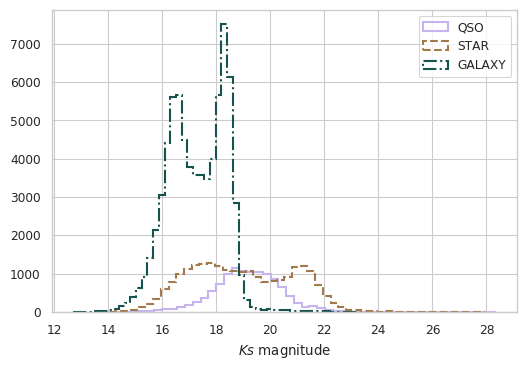

In [34]:
plot_class_histograms(kids_train, BAND_COLUMNS)

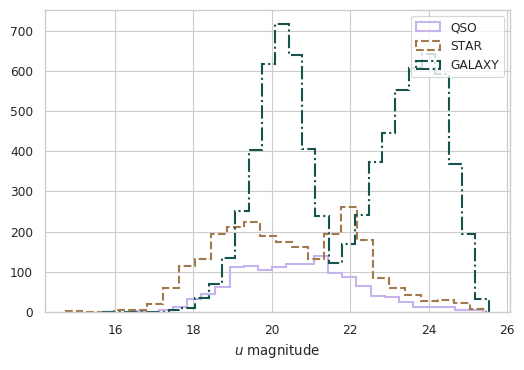

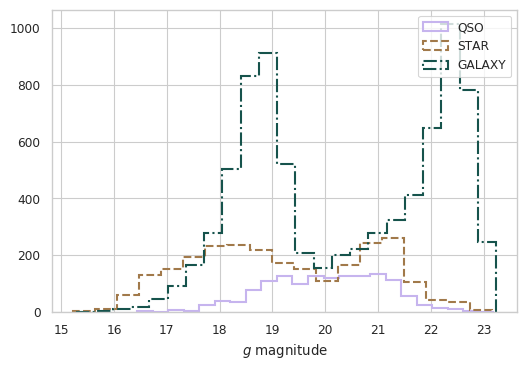

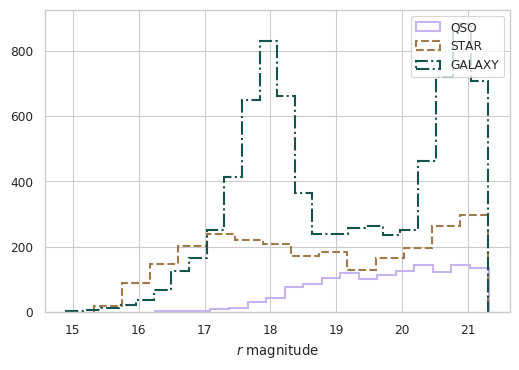

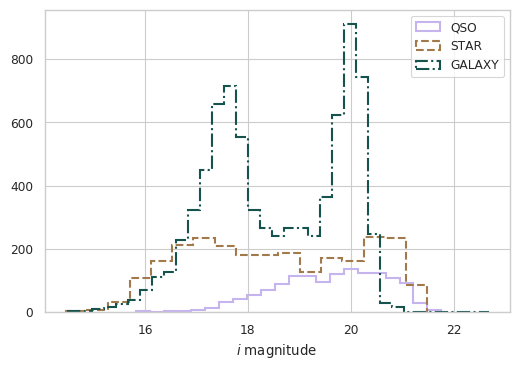

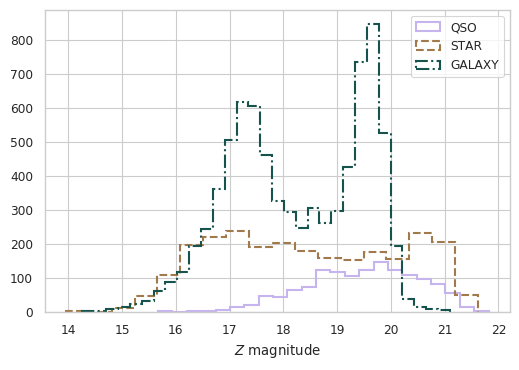

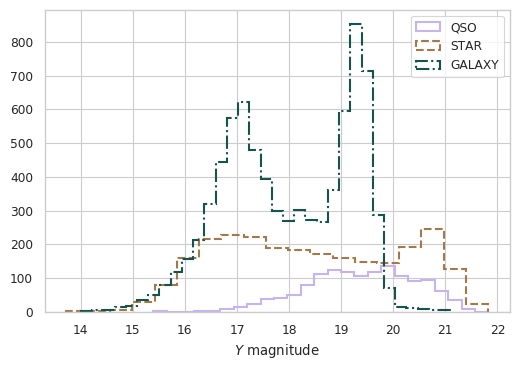

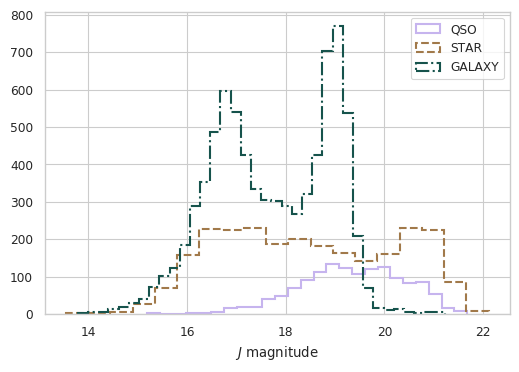

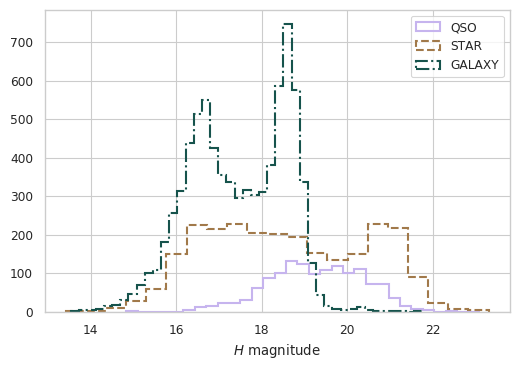

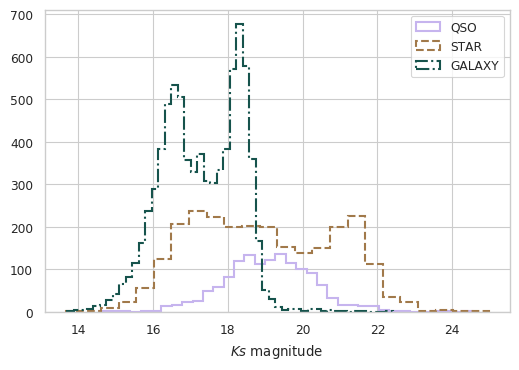

In [35]:
plot_class_histograms(kids_test_rnd, BAND_COLUMNS)

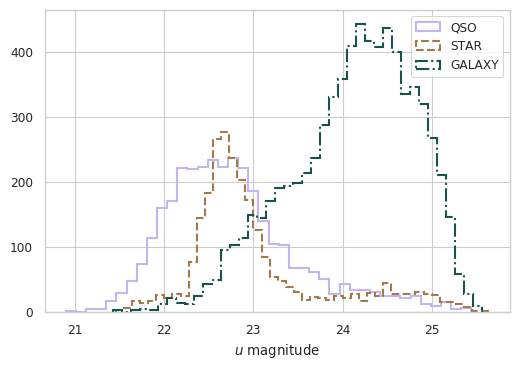

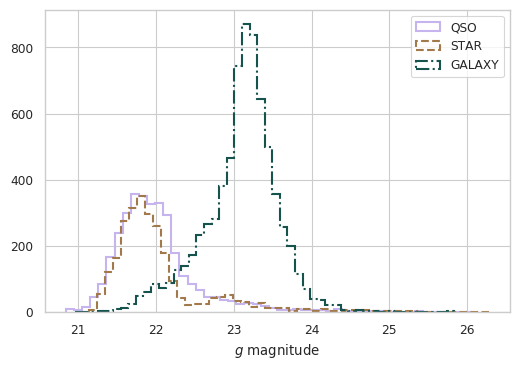

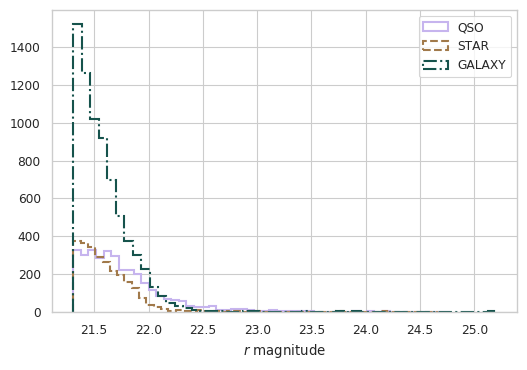

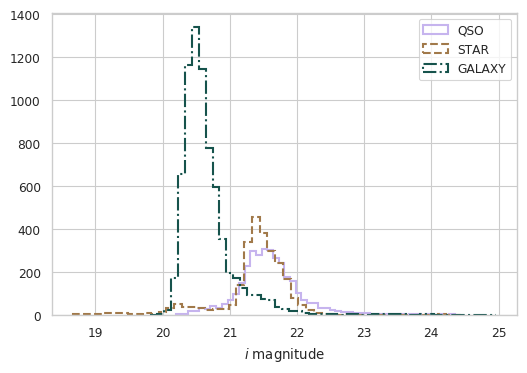

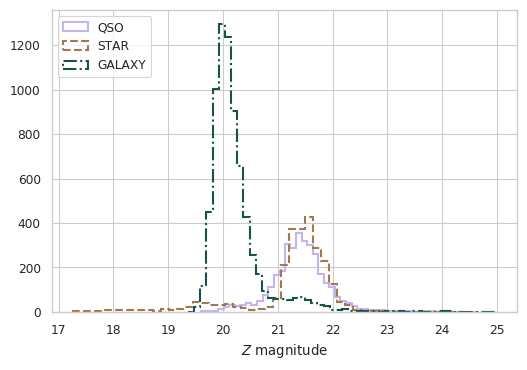

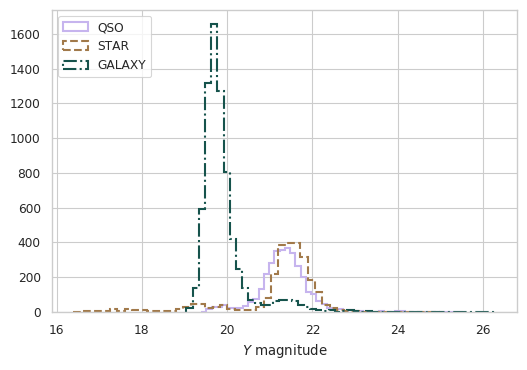

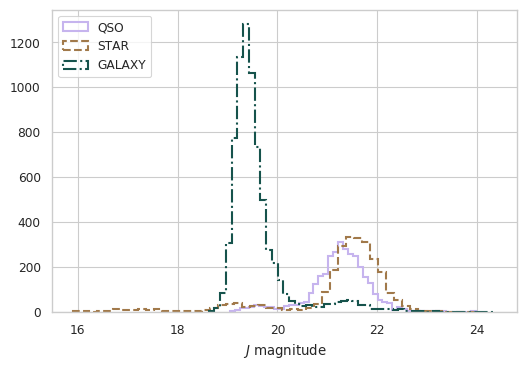

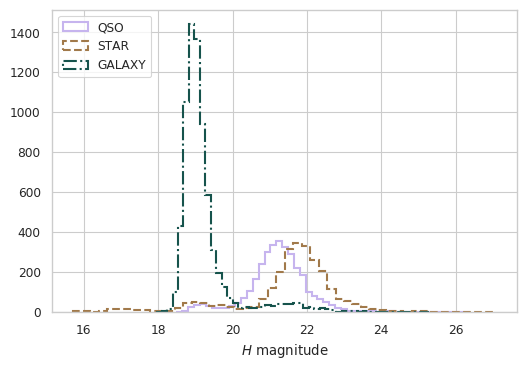

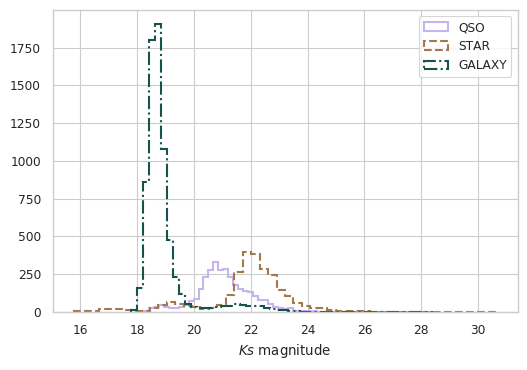

In [36]:
plot_class_histograms(kids_test_top, BAND_COLUMNS)